In [13]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
import scipy as sp

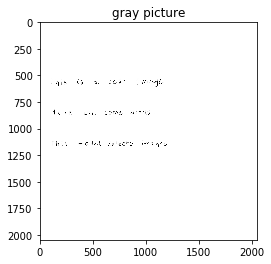

In [14]:
# 0 to 100 score intensity of each line of pixels 
# create a graph of the intensities by y axis 

img = cv2.imread('TestImg.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap = 'gray')
plt.title('gray picture')
plt.show()

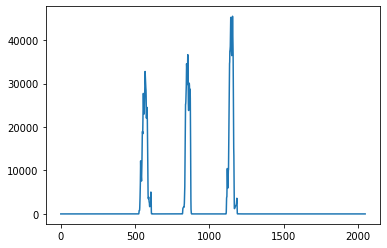

In [15]:
intensities = np.zeros(len(gray))
for i in range(len(gray)):
    for j in range(len(gray[i])):
        intensities[i] = intensities[i] + (255 - gray[i][j])
        
plt.plot(np.arange(0, len(gray)), intensities)

In [16]:
gray_high = gray.copy()
gray_high.shape

(2048, 2048)

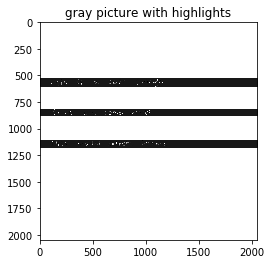

True

In [17]:
for i in range(len(gray_high)):
    if (intensities[i] > 75):
        gray_high[i] = gray_high[i] +25 
plt.imshow(gray_high, cmap = 'gray')
plt.title('gray picture with highlights')
plt.show()
cv2.imwrite('high.jpg', gray_high)

In [18]:
def get_end(img, start_pos):
    for i in range(start_pos, len(img)):
        if (img[i][0] > 50):
            return (start_pos, i)

In [19]:
lines = []
i = 0
while i < len(gray_high):
    if(gray_high[i][0]<=50):
        start_pos = i
        line = get_end(gray_high, i)
        i = line[1]
        lines.append(line)
    else :
        i = i+4
print(lines)

[(528, 610), (822, 879), (1115, 1188)]


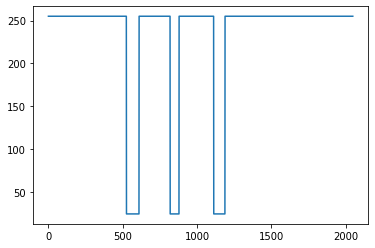

In [20]:
first_cell = [gray_high[i][0] for i in range(len(gray_high))]

plt.plot(np.arange(0, len(gray_high)), first_cell)

In [21]:
def get_letter(line, img):
    side_len = line[1] - line[0]
    for i in range(len(img)):
        return None 

In [22]:

def plot_line_graph(line, img):
    plt.figure(figsize=(40,10))
    arr = []
    for i in range(len(img)):
        sum = 0
        for j in range(line[0], line[1]):
            sum = sum + (255 - img[j][i])
        #print(sum)
        arr.append(sum)
    plt.plot(np.arange(0, len(img)), arr)

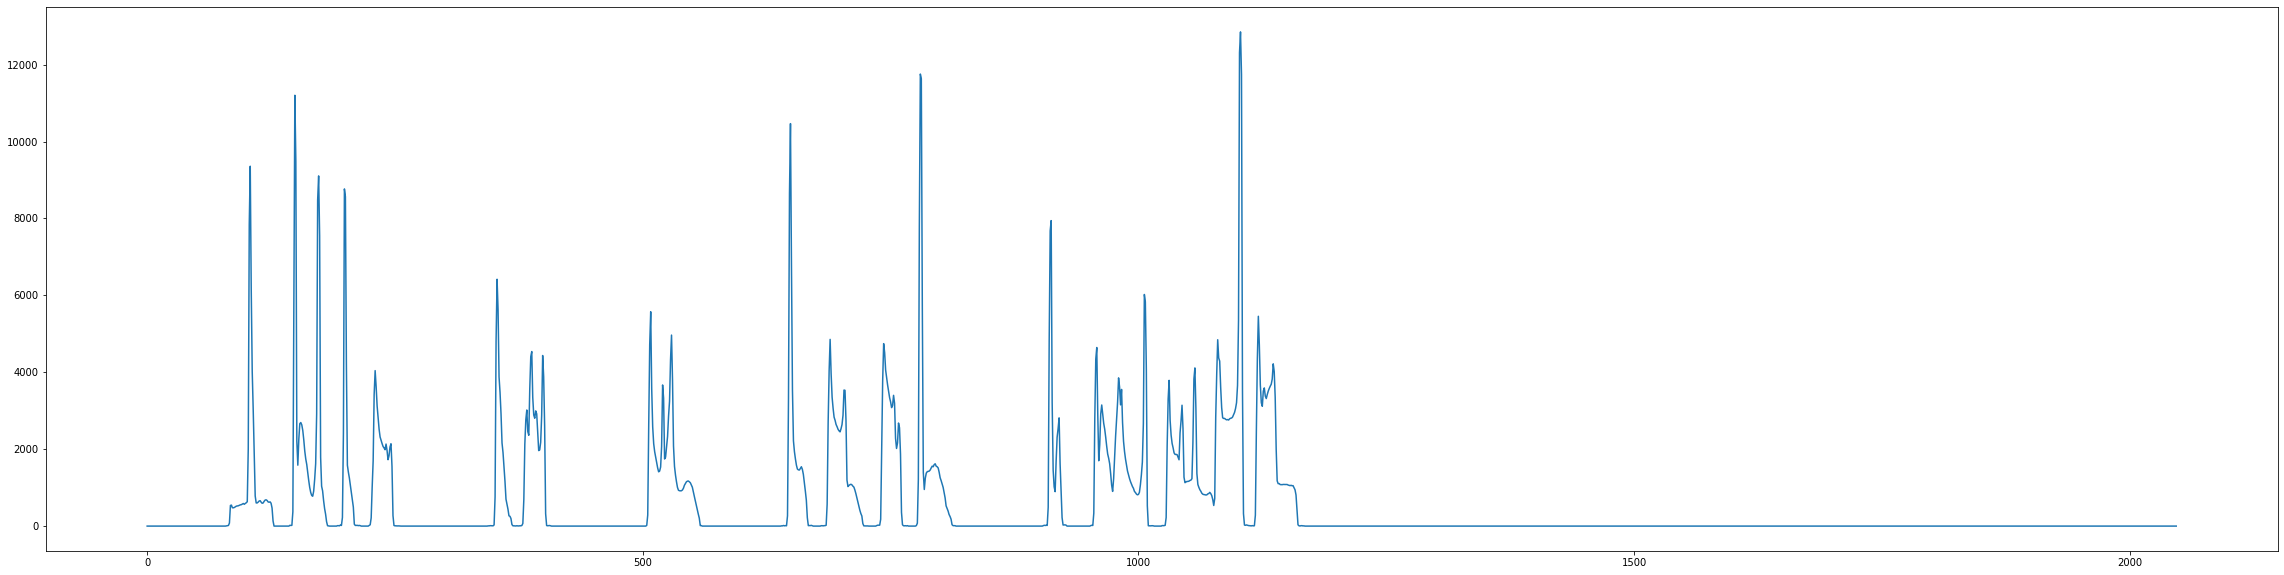

In [23]:
plot_line_graph(lines[0], gray)

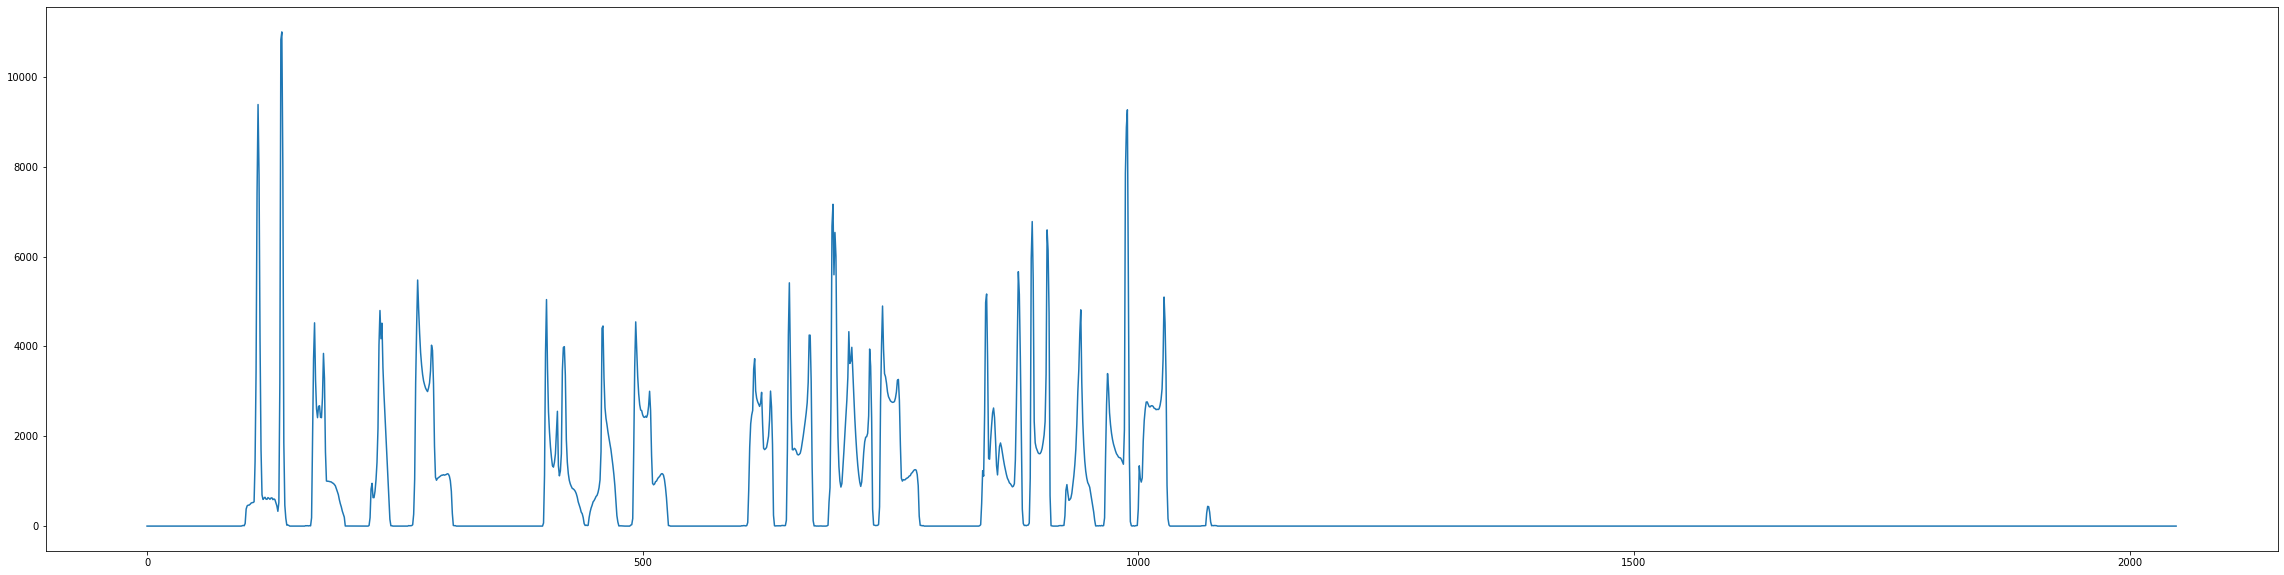

In [24]:
plot_line_graph(lines[1], gray)

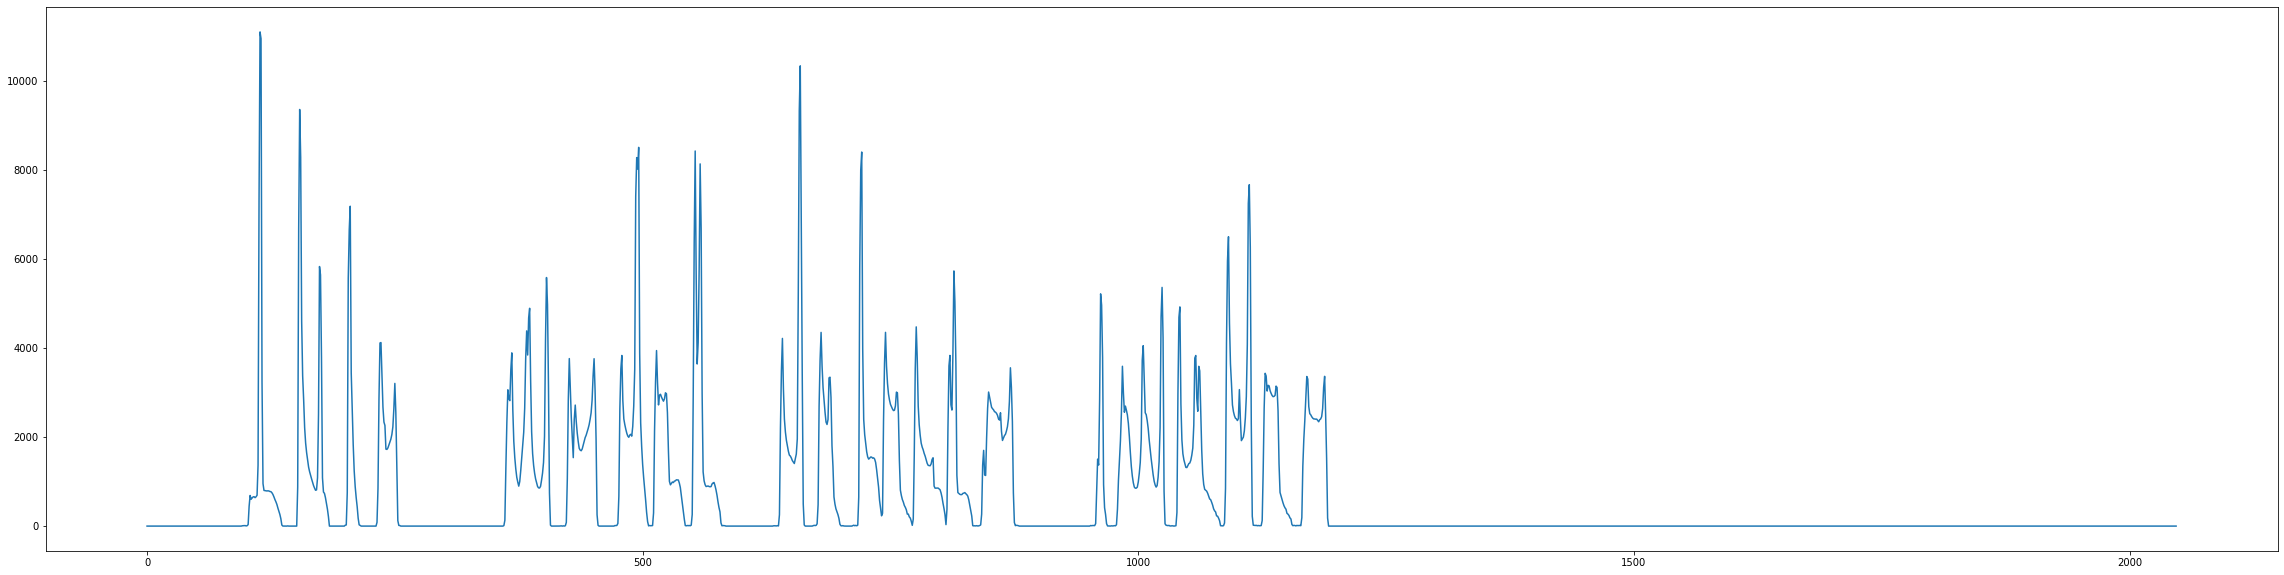

In [25]:

plot_line_graph(lines[2], gray)

In [26]:
#plot_line_graph(lines[3], gray)

In [27]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [28]:
model = tf.keras.models.load_model('nn_emnist')

In [29]:
import scipy as sp 
import scipy.signal
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 
          'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 
          'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 
          's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

In [2]:
# graph out intensities in a line 
def get_line_signal(line, img):
    arr = []
    for i in range(len(img)):
        sum = 0
        for j in range(line[0], line[1]):
            sum = sum + (255 - img[j][i])
        #print(sum)
        arr.append(sum)
    return arr

In [3]:
def pad_out(img):
    for i in range(len(img)):
        for j in range(len(img[0])):
            if i < 5 or j < 5:
                img[i][j] = 255
    return img


In [4]:
def get_lines():
    text = ""
    for line in lines:
        #line = lines[0]
        char_space = int((line[1]-line[0]))
        signal = get_line_signal(line, gray)
        peaks_arr = sp.signal.find_peaks(signal, threshold=75, distance=char_space//3)

        
        for peak in peaks_arr[0]:
            #print(peak)
            kernel = gray[line[0]:line[1], (peak-char_space//2):(peak+char_space//2)]
            resized = cv2.resize(kernel, (28, 28), interpolation = cv2.INTER_AREA)
            sharpen_k = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
            im = 255 - cv2.filter2D(resized, -1, sharpen_k)
            rotated_im = cv2.flip(np.rot90(im), -1)

            pred = model.predict(rotated_im.reshape(1, 28, 28, 1))
            text = text + labels[(pred.argmax())]
        text = text+"\n"

    return text

In [5]:
print(get_lines())

Thisisatestimge
Herearesomewords
Thismodeldewectsimages
